# Import

In [7]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
%matplotlib inline

# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 150

import seaborn as sns
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go

import stemgraphic as stem
from mgt2001 import *
import mgt2001

import random
import itertools
import math
from IPython.display import display_html
plt.style.use('ggplot') # refined style


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

mgt2001.__version__

'0.1.111'

# Chapter 5 : Data Collection and Sample Distribution

Population has parameter, sample has statistics  

### Sampling Methods
- non-probabilistic sampling (**unequal** possibility of entering the sample)
  - Convenience (ex. volunteers)
  - Judgment (select the samples most representive of the population)
- probabilistic sampling (**equal** and **known** possibility of entering the sample)
  - Simple Random Sampling  
  - Stratified Random Sampling (Seperate the population to several set, then draw random samples from sets)
  - Cluster Sampling (Similar as stratified, each cluster is a representative small-scale version of the population )
  - Systematic Sampling (sample one element for every N/n elements in the population)

### Random sampling using python
random.sample(): Random sample without replacement  
random.choices(): Random sample with replacement  
random.shuffle(): Random Permutation  
randome.seed()  
random.randint(a, b) a <= int <= b  
  
### Sampling Error  
The absolute difference between an unbiased point estimate and the corresponding population parameter  
Expected to happen  
It is the result of using a subset of the population (the sample), and not the entire population to develop estimates  
Increase sample size will reduce sampling error  
  
Mean absolute error (MAE) : 1/n $\Sigma$ |e<sub>k</sub>|  
Root Mean Squared Error (RMSE) : $\sqrt{(1/n) \Sigma ek^2}$   
RMSE is more sensitive to outliers

### Non-Sampling Error  
Non-sampling errors occur due to mistakes made along the process of data acquisition  
Increasing sample size **will not** reduce this type of error  
Types of non-sampling error :  
- Errors in data acquisition
- Non-response errors
- Selection bias
- Self-selection bias  
#### Self-selection bias  
Individuals select themselves into a group, causing a **biased sample with nonprobability sampling**  



# Chapter 9 : Sampling Distribution


A sampling distribution of a statistic is a probability distribution of the statistics created by the sampling process  
![](https://i.imgur.com/a7Ytvnv.png)
![](https://i.imgur.com/jYGD170.png)  
Xbar tends to be closer to $\mu$ as the sample size increases  

### Central Limit Theorm  
The larger the sample size, the more closely the sampling distribution of $\bar{x}$ will resemble a normal distribution  
with mean = $\mu$ and variance = $\sigma^2$/n  

#### Scipy.stats  
- rvs: random variable
- pdf: Probability density function
- cdf: Cumulative distribution function
- ppf: Percent point function (Inverse CDF)


### Example : 
The amount of soda pop in each bottle is normally distributed with a mean of 32.2 ounces and a standard deviation of .3 ounces  
Find the probability that 4 bottles will have a mean more than 32 ounces  

In [2]:
xbar = 32 #Sample mean
mu = 32.2 # Population mean
std = 0.3 # Population std
n = 4 # Sample size
zcv = (xbar - mu) / (std / math.sqrt(n)) # Normalize
p = 1 - stats.norm.cdf(zcv)
print (p)

0.9087887802741352


![](https://i.imgur.com/8l4mZgB.png)
![](https://i.imgur.com/aHb2ZYn.png)


### Standard Deviation of $\bar{x}$  
- Finite Population :  
![](https://i.imgur.com/nXjnA27.png)
- Infinite Population :   
When doing **random sample without replacement**  
A finite population can be treated as infinite if n/N <= 0.5  
![](https://i.imgur.com/mL4iKSV.png)  
 &radic;(N-n)/(N-1) is the finite correction factor  
 
 ### Binomial Experiment  
 ![](https://i.imgur.com/TSEPFVI.png)  

## Normal approximation to the binomial
Normal approximation to the binomial works best when  
- sample size is large    
- probability of success is close to 0.5.  
np > 5 && n(1-p) > 5  
$\mu$ = np 
$\sigma^2$ = np(1-p)  
![](https://i.imgur.com/LYOENLN.png)  


## Population and Sample Proportion
The estimate of $p$ is $\hat{p}$ = number of success / n  
$E[\hat{p}]$ = $p$  
$\sigma$<sub>$\hat{p}$</sub> = $\sqrt{p(1-p)/n}$
p = population proportion  
n = sample size  
$\sigma$<sub>$\hat{p}$</sub> is standard error of proportion  
![](https://i.imgur.com/zJA099N.png)  


### Standard deviation of sampling distribution $\hat{p}$  
![](https://i.imgur.com/5UtccW5.png)  

## Sampling Distribution of the Difference Between Two Means  
![](https://i.imgur.com/XeNWepV.png)  
![](https://i.imgur.com/sEfGJ8R.png)  


# Chapter 10 : Introdiction to Estimation  
Estimator Charateristics : 
- Unbiasedness  
Expected value of sample statistics is equal to the population parameter being estimated  
- Consistency  
The point estimator become ** closer** to the population parameter as the sample size becomes bigger  
- Efficiency  
If there are two or more unbiased estimators of a parameter, the one whose variance (standard deviation) is **smaller** is said to be relatively efficient


## Estimating $\mu$ When $\sigma$ is known  
$\bar{x}$ = the sample mean  
1 – $\alpha$ = the confidence level  
z<sub>$\alpha / 2$ </sub>/2 = the z value providing an area of $\alpha$/2 in the upper tail of the standard normal probability distribution  
s = the population standard deviation  
n = the sample size  

![](https://i.imgur.com/ZaVAAf8.png)  


### Code Example :

In [3]:
sample = np.array([180, 130, 150, 165, 90, 130, 120, 60, 200, 180, 80, 240, 210, 150, 125])
alpha = 0.05
Xbar = sample.mean()
zvalue = stats.norm.ppf(1-alpha/2)
std = 40
n = 15
lcl = Xbar - zvalue * (std / (n ** 0.5))
ucl = Xbar + zvalue * (std / (n ** 0.5))

print (f"Confidence interval : {lcl:.4f} to {ucl:.4f}")

Confidence interval : 127.0909 to 167.5758


## Determining the Sample Size  
estimate the mean to within w units : $\bar{x}$ +- w  
w = z<sub>$\alpha$/2</sub> * $\sigma$ / $\sqrt{n}$  
n =  ( z<sub>$\alpha$/2</sub> * $\sigma$ / w )$^2$  


## Estimation of 𝜇 Using the Sample Median  
![](https://i.imgur.com/YnvQNCW.png)  
![](https://i.imgur.com/akpwPBF.png)  



# Introdiction to Hypothesis Testing  
$H$<sub>0</sub> : Null hypothesis  
$H$<sub>1</sub> : Alternative hypothesis (The one we want to prove)  
### Type of Errors  
![](https://i.imgur.com/fwW08R8.png)  
P(Type I error) = $\alpha$  
P(Type II error) = $\beta$  
1 - $\alpha$ is called **Confidence Level**  
1 - $\beta$ is called **Power of Test** (Reject a false null hypothesis )

#### The Rejection Region Method  
- $H$<sub>1</sub> : $\mu$ > $\mu$<sub>0</sub>  
The Rejection Region is: $\bar{x}$ >= $\bar{x}$<sub>c</sub>  
- $H$<sub>1</sub> : $\mu$ < $\mu$<sub>0</sub>  
The Rejection Region is: $\bar{x}$ <= $\bar{x}$<sub>c</sub>  
- $H$<sub>1</sub> : $\mu$ $\neq$ $\mu$<sub>0</sub>  
The Rejection Region is: $\bar{x}$ <= $\bar{x}$<sub>L</sub> or   $\bar{x}$ >= $\bar{x}$<sub>U</sub>  
alpha needs to be divided by 2 when computing critical value  
![](https://i.imgur.com/a2jmmG2.png) (Can vary for different $H$<sub>1</sub> )  

#### Testing Statistics  
Using standardized value $z = (\bar{x} - \mu) / (\sigma / \sqrt{n})$


#### $p$-value Method (most commonly used) 
![](https://i.imgur.com/dfRzp1J.png)  
If the p-value < $\alpha$ then reject the null hypothesis  
**Code Example :**

In [4]:
Xbar = 190
mu = 200
n = 9 # df.shape[0] if using dataframe
std = 50
z = (Xbar - mu) / (std / (n**0.5))
p_value = 1 - stats.norm.cdf(z)
print (p_value)

0.7257468822499265


### Calculating Type II Errors  
Quick review :  
Type II error is when we don't reject a false null hypothesis  
1 - $\beta$ = Power of test    
**Code Example :**

In [5]:
meanH0 = 40
n = 25
alpha = 0.05
std = 5
zcv = stats.norm.ppf(1-alpha)
print (f"z critical value : {zcv:.4f}")
xcv = meanH0 - zcv*std / (n**0.5) 
print (f"x critical value : {xcv:.4f}")
meanH1 = 37
ztype2 = (xcv - meanH1) / (std / (n**0.5))
type2p = 1-stats.norm.cdf(ztype2)
print (f"P(TypeII) : {type2p:.4f}")
ptest = 1 - type2p
print (f"Power of Test : {ptest:.4f}")

z critical value : 1.6449
x critical value : 38.3551
P(TypeII) : 0.0877
Power of Test : 0.9123


### Drawing Characteristic Curve

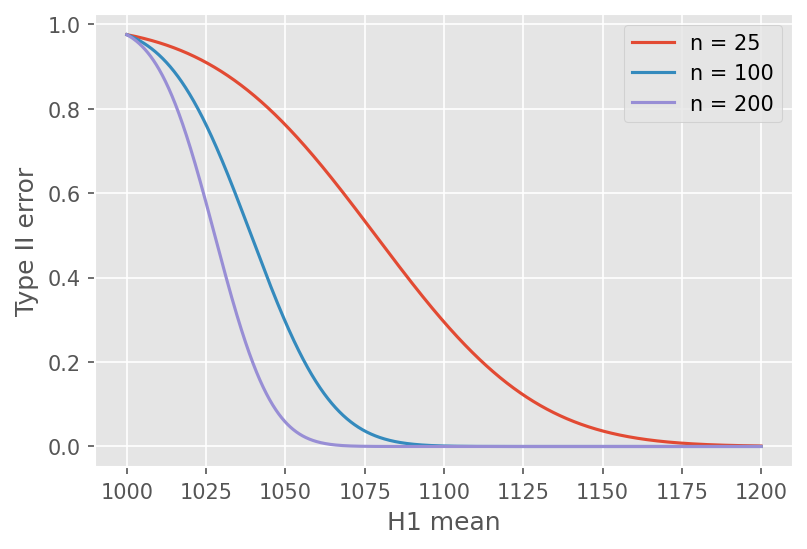

In [11]:
# Got three different characteristic curve to compare in this case
# This is a two tailed test, so we have to draw the other side, 
# which is in the next block
meanH0 = 1000
n = 25
alpha = 0.05
std = 200
zcv = stats.norm.ppf(1-alpha/2)
#print (f"z critical value : {zcv:.4f}")
xcv = meanH0 + zcv*std / (n**0.5) 
#print (f"x critical value : {xcv:.4f}")
meanvec = np.arange (1000, 1200, 0.1)
betavec = np.zeros(meanvec.shape[0])
for i, meanh1 in enumerate(meanvec):
    ztype2 = (xcv - meanh1) / (std / (n**0.5))
    type2p = stats.norm.cdf(ztype2)
    betavec[i] = type2p

_1 = plt.plot(meanvec, betavec, label = "n = 25") # Remember to change the label

meanH0 = 1000
n = 100
alpha = 0.05
std = 200
zcv = stats.norm.ppf(1-alpha/2)
#print (f"z critical value : {zcv:.4f}")
xcv = meanH0 + zcv*std / (n**0.5) 
#print (f"x critical value : {xcv:.4f}")
meanvec = np.arange (1000, 1200, 0.1)
betavec = np.zeros(meanvec.shape[0])
for i, meanh1 in enumerate(meanvec):
    ztype2 = (xcv - meanh1) / (std / (n**0.5))
    type2p = stats.norm.cdf(ztype2)
    betavec[i] = type2p

_2 = plt.plot(meanvec, betavec, label = "n = 100") # Remember to change the label

meanH0 = 1000
n = 200
alpha = 0.05
std = 200
zcv = stats.norm.ppf(1-alpha/2)
#print (f"z critical value : {zcv:.4f}")
xcv = meanH0 + zcv*std / (n**0.5) 
#print (f"x critical value : {xcv:.4f}")
meanvec = np.arange (1000, 1200, 0.1)
betavec = np.zeros(meanvec.shape[0])
for i, meanh1 in enumerate(meanvec):
    ztype2 = (xcv - meanh1) / (std / (n**0.5))
    type2p = stats.norm.cdf(ztype2)
    betavec[i] = type2p

_3 = plt.plot(meanvec, betavec, label = "n = 200") # Remember to change the label


plt.legend()
plt.xlabel("H1 mean")
plt.ylabel("Type II error")
plt.show()

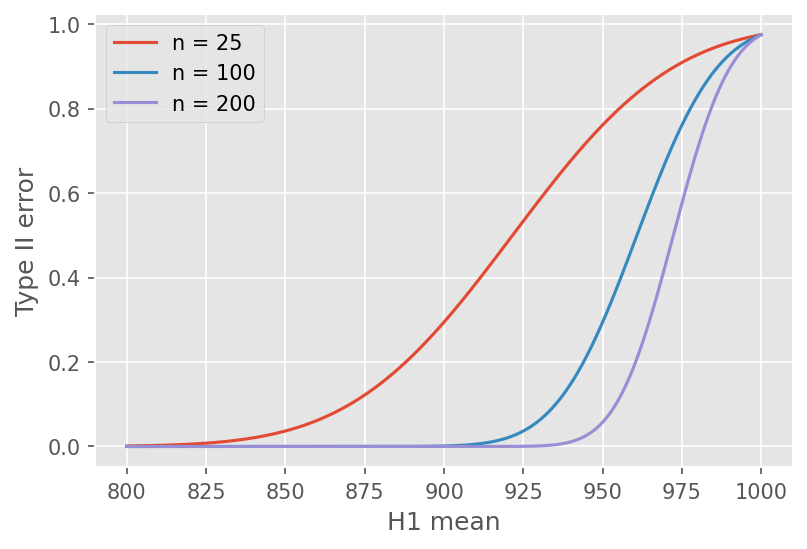

In [12]:
meanH0 = 1000
n = 25
alpha = 0.05
std = 200
zcv = stats.norm.ppf(1-alpha/2)
#print (f"z critical value : {zcv:.4f}")
xcv = meanH0 - zcv*std / (n**0.5) 
#print (f"x critical value : {xcv:.4f}")
meanvec = np.arange (800, 1000, 0.1)
betavec = np.zeros(meanvec.shape[0])
for i, meanh1 in enumerate(meanvec):
    ztype2 = (xcv - meanh1) / (std / (n**0.5))
    type2p = 1-stats.norm.cdf(ztype2)
    betavec[i] = type2p

_1 = plt.plot(meanvec, betavec, label = "n = 25")

meanH0 = 1000
n = 100
alpha = 0.05
std = 200
zcv = stats.norm.ppf(1-alpha/2)
#print (f"z critical value : {zcv:.4f}")
xcv = meanH0 - zcv*std / (n**0.5) 
#print (f"x critical value : {xcv:.4f}")
meanvec = np.arange (800, 1000, 0.1)
betavec = np.zeros(meanvec.shape[0])
for i, meanh1 in enumerate(meanvec):
    ztype2 = (xcv - meanh1) / (std / (n**0.5))
    type2p = 1-stats.norm.cdf(ztype2)
    betavec[i] = type2p

_2 = plt.plot(meanvec, betavec, label = "n = 100")

meanH0 = 1000
n = 200
alpha = 0.05
std = 200
zcv = stats.norm.ppf(1-alpha/2)
#print (f"z critical value : {zcv:.4f}")
xcv = meanH0 - zcv*std / (n**0.5) 
#print (f"x critical value : {xcv:.4f}")
meanvec = np.arange (800, 1000, 0.1)
betavec = np.zeros(meanvec.shape[0])
for i, meanh1 in enumerate(meanvec):
    ztype2 = (xcv - meanh1) / (std / (n**0.5))
    type2p = 1-stats.norm.cdf(ztype2)
    betavec[i] = type2p

_3 = plt.plot(meanvec, betavec, label = "n = 200")


plt.legend()
plt.xlabel("H1 mean")
plt.ylabel("Type II error")
plt.show()

Ways of ruduce type II error :
- increase $\alpha$ (Not favorable)  
- increase sample size ($\alpha$ won't change, but $\beta$ becomes smaller)  
  


# Chapter 12 :Inference About a Population  
## Inference about $\mu$ when $\sigma$ is unknown  
Use the student t distribution (If the population is normal distributed)  
Use the sample standard deviation to estimate the population standard deviation  
### **Interval Estimation :**  
![](https://i.imgur.com/zOfSXrr.png)  
where t<sub>$\alpha$/2,n-1</sub> = the t value providing an area of $\alpha$/2 in the upper tail of a t distribution with n – 1 degrees of freedom  
Can be computed by **stats.t.ppf(1-alpha, df = dof1)**  
#### Code Example :

In [ ]:
df1 = pd.read_excel('.xlsx')
std = df1[''].std()
mean = df1[''].mean()
siglevel = 
nobs = df1.shape[0]

tcv = stats.t.ppf (1 - siglevel/2, df = nobs-1)

lcl = mean - tcv * std / (nobs ** 0.5)
ucl = mean + tcv * std / (nobs ** 0.5)
print (f"[lcl, ucl] = [{lcl:.4f}, {ucl:.4f}]")

### Hypothesis Testing with t-distribution

In [14]:
xbar = 460.38
std = 38.83
nobs = 50
alpha = 0.05
meanh1 = 450

# t critical value
tcv = stats.t.ppf(1-alpha, df = nobs-1)
print (f"tcv = {tcv:.4f}")

# x critical value
xcv = meanh1 + tcv * std / (nobs**0.5)
print (f"xcv = {xcv:.4f}")

# p-value
tvalue = (xbar-meanh1) / (std / (nobs**0.5))
pvalue = 1- stats.t.cdf (tvalue, df = nobs-1)
print (f"p-value = {pvalue:.4f}")

tcv = 1.6766
xcv = 459.2066
p-value = 0.0323


### Small Note
Draw a histogram to see if the data is bell-shaped  
if the data is extremely skewed, then t-statistics would not be valid  


## Inference About a Population Variance
### Chi-Squared (If the Population is normally distributed)  
Using sample variance s$^2$ to estimate $\sigma^2$  
**(n-1)*s$^2$ / $\sigma^2$**  

**Finding Critical Value in Python**  
ex. $X^2$<sub>0.05,5</sub>

In [18]:
alpha = 0.05
dof = 5 # Degree of Freedom
chicv = stats.chi2.ppf (1-alpha, dof)
print (f"Chi-Square critical value = {chicv:.4f}")



Chi-Square critical value = 11.0705


### Rejection Region 
**Right Tail :**  
![](https://i.imgur.com/W18jckB.png)  
**Left Tail :**  
![](https://i.imgur.com/nFaCs71.png)  
**Two Tail :**  
![](https://i.imgur.com/mdUglMY.png)  

### p-value  
we compute X$'^2$ by  
![](https://i.imgur.com/lzCUS0a.png)
If X$'^2$ is to the **right** of the mode  
p-value = 2 p(X$^2$ > X$'^2$)  
If X$'^2$ is to the **left** of the mode  
p-value = 2 p(X$^2$ < X$'^2$)    
**Degree of Freedom is n-1 !!!**  
### *Code Example*

In [19]:
df_12_75 = pd.read_excel ('Xr12-75.xlsx')
mean = df_12_75['Mileage'].mean()
std = df_12_75 ['Mileage'].std()
siglevel = 0.1
nobs = df_12_75.shape[0]

h0var = 23
# This is a left tail test
chistat = (nobs-1) * std**2 / h0var
print (chistat)
# Chi-Square critical value
chicv_u = stats.chi2.ppf (1-siglevel, nobs-1)
# S^2 Critical value
scv_u = chicv_u * h0var / (nobs-1)
print (scv_u)
p_lefttail = stats.chi2.cdf (chistat, nobs-1)

FileNotFoundError: [Errno 2] No such file or directory: 'Stat Excels/Xr12-75.xlsx'

## Confidence Interval  
![](https://i.imgur.com/oFygHId.png)  


## Inference About a Populaton Proportion
$\hat{p} = x / n$  
where x is number of success  
n is the sample size  
#### Reject Region  
![](https://i.imgur.com/JdTG2rY.png)
#### Test Statistics
![](https://i.imgur.com/4VkRrFV.png)  
![](https://i.imgur.com/SSUecLn.png)  
#### p-value  
one Tail :  
![](https://i.imgur.com/rBDNnw5.png)  
Two Tail :  
compute the p-value from one side and multiply the value by 2  
### **Code Example**

In [ ]:
df = pd.read_excel(".xlsx") 

alpha = 0.05
h0p = 0.5
data = df.Vote == 2

mean = data.mean() # Sample proportion
nobs = data.shape[0]
phead_std = (h0p*(1-h0p)/nobs)**0.5
zcv = stats.norm.ppf (1-alpha) # z critical value
zvalue = (mean-h0p)/phead_std 
pvalue = 1 - stats.norm.cdf (zvalue)


### Interval Estimator
![](https://i.imgur.com/7ncbUlF.png)  

## Wilson Estimator
used when estimating a relatively rare event
$\hat{p}$ = (x+2) / (n+4)  
$\sigma$<sub>$\hat{p}$</sub> = $\sqrt{(\hat{p}(1-\hat{p})) / (n+4)}$  

## Population Total Using Proportion and Sample Size  
![](https://i.imgur.com/F9RgWfd.png)  

Adapt Finite Population Correction Factor (FPCF)  
When Population size is small  
![](https://i.imgur.com/ZGW7xGE.png)